<a href="https://colab.research.google.com/github/soumik12345/Radium/blob/monte_carlo/notebooks/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clone Repository

In [1]:
!git clone https://github.com/soumik12345/Radium -b monte_carlo --recursive
%cd Radium

Cloning into 'Radium'...
remote: Enumerating objects: 376, done.
remote: Counting objects: 100% (376/376), done.
remote: Compressing objects: 100% (264/264), done.
remote: Total 376 (delta 167), reused 295 (delta 97), pack-reused 0
Receiving objects: 100% (376/376), 4.10 MiB | 21.67 MiB/s, done.
Resolving deltas: 100% (167/167), done.
Submodule 'src/lib/headers/tqdm' (https://github.com/aminnj/cpptqdm) registered for path 'src/lib/headers/tqdm'
Cloning into '/content/Radium/src/lib/headers/tqdm'...
remote: Enumerating objects: 114, done.        
remote: Total 114 (delta 0), reused 0 (delta 0), pack-reused 114        
Receiving objects: 100% (114/114), 573.54 KiB | 13.03 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Submodule path 'src/lib/headers/tqdm': checked out '04c733fd38cdc1763d7bc19f8ff3a8fb6e95e2e9'
/content/Radium


## Write Your Code to `./src/main.cpp`

In [2]:
%%writefile ./src/main.cpp
#include "Radium.h"


int main() {

    // Initialize Renderer
    Renderer renderer(1024, 768, 40); // Frame Width, Frame Height, Samples Per Pixel

    // Set Camera Position and Direction
    renderer.setCameraPosition(50, 52, 295.6);
    renderer.setCameraDirection(0, -0.042612, -1);

    // Construct Cornell Box Scene using Spheres
    renderer.addObject(
            Sphere(1e5, Vector3(1e5 + 1, 40.8, 81.6), Vector3(), Vector3(.75, .25, .25), DIFFUSE));
    renderer.addObject(
            Sphere(1e5, Vector3(-1e5 + 99, 40.8, 81.6), Vector3(), Vector3(.25, .25, .75), DIFFUSE));
    renderer.addObject(
            Sphere(1e5, Vector3(50, 40.8, 1e5), Vector3(), Vector3(.75, .75, .75), DIFFUSE));
    renderer.addObject(
            Sphere(1e5, Vector3(50, 40.8, -1e5 + 170), Vector3(), Vector3(), DIFFUSE));
    renderer.addObject(
            Sphere(1e5, Vector3(50, 1e5, 81.6), Vector3(), Vector3(.75, .75, .75), DIFFUSE));
    renderer.addObject(
            Sphere(1e5, Vector3(50, -1e5 + 81.6, 81.6), Vector3(), Vector3(.75, .75, .75), DIFFUSE));
    renderer.addObject(
            Sphere(16.5, Vector3(27, 16.5, 47), Vector3(), Vector3(1, 1, 1) * .999, SPECULAR));
    renderer.addObject(
            Sphere(16.5, Vector3(73, 16.5, 78), Vector3(), Vector3(1, 1, 1) * .999, REFRACTED));
    renderer.addObject(
            Sphere(600, Vector3(50, 681.6 - .27, 81.6), Vector3(12, 12, 12), Vector3(), DIFFUSE));

    // Render
    renderer.render(false); // Enable Progressbar Flag

    return 0;
}

Overwriting ./src/main.cpp


In [3]:
!time ./build_and_run.sh

-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: /usr/bin/c++ -- works
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /content/Radium/build
Scanning dependencies of target radium
[ 20%] Building CXX object CMakeFiles/radium.dir/src/lib/Renderer.cpp.o
[ 40%] Building CXX object CMakeFiles/radium.dir/src/lib/Sphere.cpp.o
[ 60%] Building CXX object CMakeFiles/radium.dir/src/lib/Vector3.cpp.o
[ 80%] Building CXX object CMakeFiles/radium.dir/src/mai

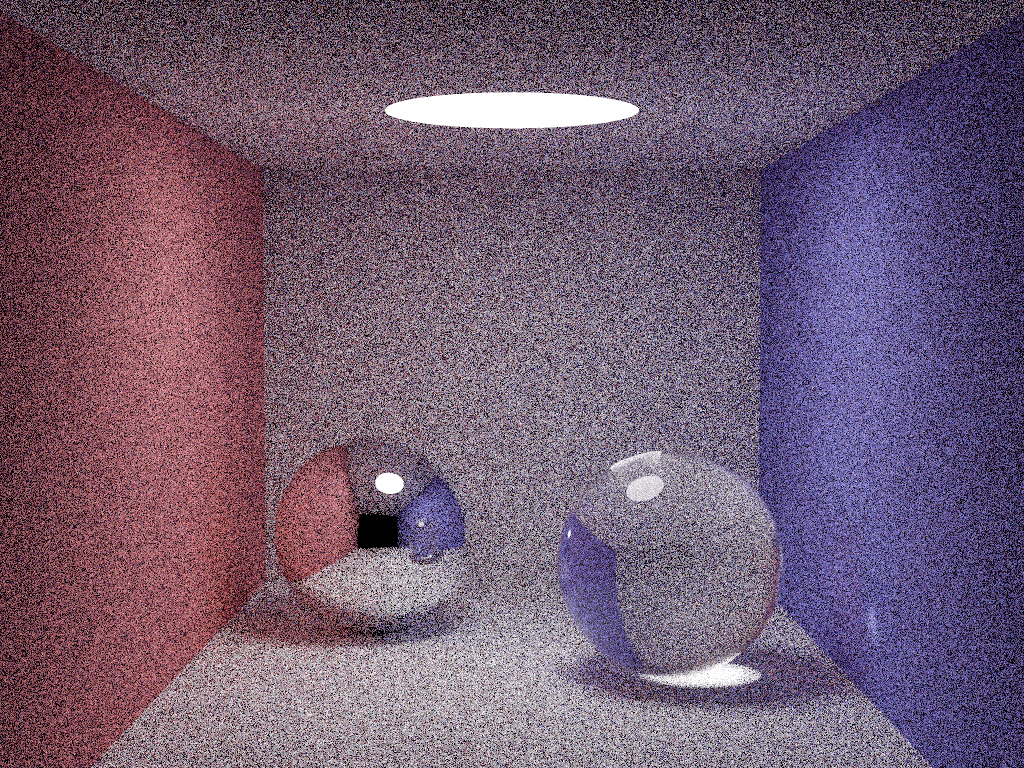

In [4]:
import cv2
from PIL import Image

Image.fromarray(
    cv2.cvtColor(
        cv2.imread('./dump/image.ppm'
        ), cv2.COLOR_BGR2RGB
    )
)